### OpenCV practice Notebook
Working on [OpenCV](https://github.com/opencv/opencv) practice using some input from [RPi for Computer Vision](https://www.pyimagesearch.com/)

In [27]:
import imutils, cv2, os
from matplotlib import pyplot as plt

In [52]:
p = os.path.sep.join(["","home","matrix","isaac.png"])
image = cv2.imread(p)

In [29]:
image.shape

(324, 324, 3)

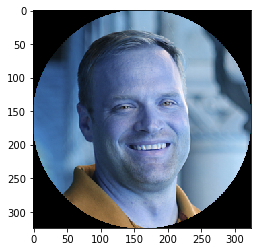

In [30]:
plt.imshow(image)

In [31]:
image[200,200]

array([37, 42, 79], dtype=uint8)

In [53]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [33]:
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

In [34]:
edged = cv2.Canny(blurred, 50, 130)

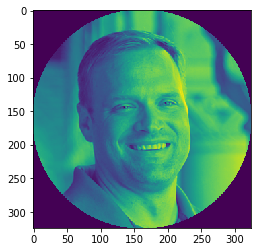

In [56]:
plt.imshow(gray)

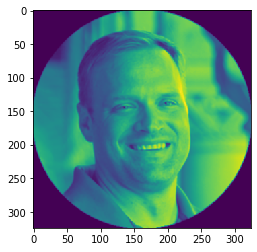

In [36]:
plt.imshow(blurred)

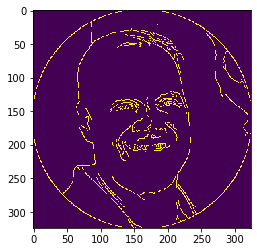

In [37]:
plt.imshow(edged)

In [38]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
total = 0

In [39]:
for c in cnts:
    if cv2.contourArea(c) < 25:
        continue
    cv2.drawContours(image, \
                     [c], \
                     -1, \
                     (204, 0, 255), \
                     2)
    total += 1

In [40]:
print("[INFO] found {} shapes".format(total))

[INFO] found 12 shapes


In [41]:
detector = cv2.CascadeClassifier("haar.xml")
rects = detector.detectMultiScale(gray, \
                                  scaleFactor=1.05, \
                                  minNeighbors=9, \
                                  minSize=(40, 40), \
                                  flags=cv2.CASCADE_SCALE_IMAGE)
print("[INFO] detected {} faces".format(len(rects)))

[INFO] detected 1 faces


In [67]:
# identify and extract the face portion of the image
i = 1
for (x, y, w, h) in rects:
    cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0), 2)
    temp_image = gray[y:(y+h),x:(x+w)]
    cv2.imwrite(('faces/face_' + str(i) + '.png'),temp_image)
    i += 1

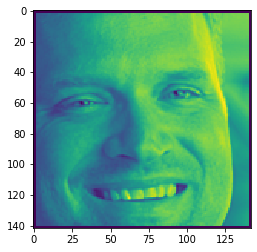

In [58]:
plt.imshow(temp_image)